In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
chicken07 = pd.read_csv('./data/chicken_07.csv')
chicken08 = pd.read_csv('./data/chicken_08.csv')
chicken09 = pd.read_csv('./data/chicken_09.csv')

In [10]:
#데이터 합치기

chicken_data = pd.concat([chicken07, chicken08, chicken09]) 

chicken_data

,기준일,요일,성별,연령대,시도,시군구,읍면동,업종,통화건수
0,20190701,월,남,30대,서울특별시,강남구,논현동,치킨,8
1,20190701,월,여,30대,서울특별시,강남구,개포동,치킨,10
2,20190701,월,여,30대,서울특별시,강남구,논현동,치킨,16
3,20190701,월,여,30대,서울특별시,강남구,수서동,치킨,5
4,20190701,월,여,30대,서울특별시,강남구,대치동,치킨,5
...,...,...,...,...,...,...,...,...,...
24112,20190930,월,남,20대,서울특별시,중랑구,면목동,치킨,8
24113,20190930,월,여,40대,서울특별시,중랑구,신내동,치킨,5
24114,20190930,월,여,40대,서울특별시,중랑구,면목동,치킨,19
24115,20190930,월,남,40대,서울특별시,중랑구,신내동,치킨,5


In [13]:
#인덱스 수정

chicken_data = chicken_data.reset_index(drop = True)
#기존의 인덱스를 drop하고, reset_index 실행.

chicken_data

,기준일,요일,성별,연령대,시도,시군구,읍면동,업종,통화건수
0,20190701,월,남,30대,서울특별시,강남구,논현동,치킨,8
1,20190701,월,여,30대,서울특별시,강남구,개포동,치킨,10
2,20190701,월,여,30대,서울특별시,강남구,논현동,치킨,16
3,20190701,월,여,30대,서울특별시,강남구,수서동,치킨,5
4,20190701,월,여,30대,서울특별시,강남구,대치동,치킨,5
...,...,...,...,...,...,...,...,...,...
76490,20190930,월,남,20대,서울특별시,중랑구,면목동,치킨,8
76491,20190930,월,여,40대,서울특별시,중랑구,신내동,치킨,5
76492,20190930,월,여,40대,서울특별시,중랑구,면목동,치킨,19
76493,20190930,월,남,40대,서울특별시,중랑구,신내동,치킨,5


In [14]:
sum_of_calls_by_week = chicken_data.groupby('요일')['통화건수'].sum()
#요일별 통화건수 합계

sum_of_calls_by_week

요일
금    159290
목    118210
수    118295
월    108492
일    158864
토    165949
화    108243
Name: 통화건수, dtype: int64

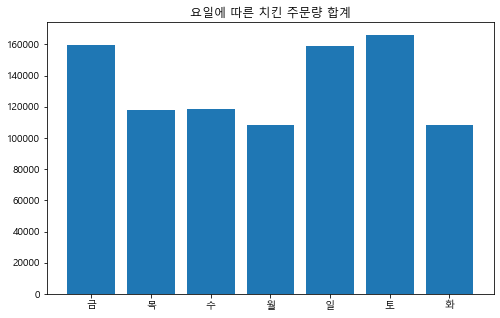

In [21]:
plt.figure(figsize = (8, 5)) #그래프 사이즈
plt.bar(sum_of_calls_by_week.index, sum_of_calls_by_week) #x축, y축 지정
plt.title('요일에 따른 치킨 주문량 합계') 
plt.show() 

#한글을 지원하지 않는 폰트를 사용하면 한글 깨짐 현상 발생.

In [17]:
plt.rcParams['font.size'] #폰트 사이즈

10.0

In [18]:
plt.rcParams['font.family'] #폰트 이름

['sans-serif']

In [19]:
plt.rcParams['font.family'] = "Malgun Gothic" #폰트 변경

In [20]:
plt.rcParams['font.family']

['Malgun Gothic']

In [22]:
sum_of_calls_by_week = chicken_data.groupby('요일')['통화건수'].sum()

In [23]:
groupdata = chicken_data.groupby('요일')
call_data = groupdata['통화건수']
sum_of_calls_by_week = call_data.sum()
#sum_of_calls_by_week = chicken_data.groupby('요일')['통화건수'].sum() 와 동일.

sorted_sum_of_calls_by_week = sum_of_calls_by_week.sort_values(ascending = True) 
#오름차순 정렬

sorted_sum_of_calls_by_week

요일
화    108243
월    108492
목    118210
수    118295
일    158864
금    159290
토    165949
Name: 통화건수, dtype: int64

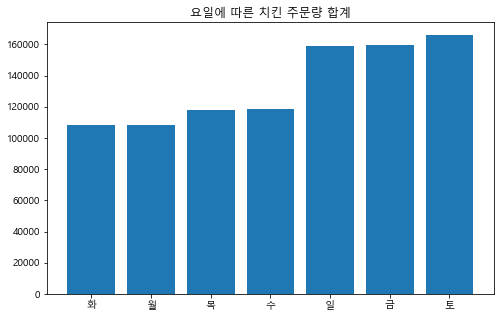

In [25]:
# 정렬을 사용해서 주문량 기준 인사이트 확인 가능.

plt.figure(figsize = (8,5))
plt.bar(sorted_sum_of_calls_by_week.index, sorted_sum_of_calls_by_week)
plt.title('요일에 따른 치킨 주문량 합계')
plt.show()

In [28]:
#요일 리스트 지정으로 요일 순서 그래프 작성

weeks = ['월', '화', '수', '목', '금', '토', '일']
sum_of_calls_by_weeks = chicken_data.groupby('요일')['통화건수'].sum().reindex(weeks)
sum_of_calls_by_weeks

요일
월    108492
화    108243
수    118295
목    118210
금    159290
토    165949
일    158864
Name: 통화건수, dtype: int64

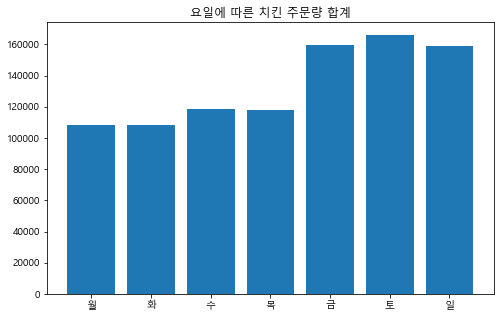

In [30]:
plt.figure(figsize = (8,5))
plt.bar(sum_of_calls_by_weeks.index, sum_of_calls_by_weeks)
plt.title('요일에 따른 치킨 주문량 합계')
plt.show()

In [35]:
sum_of_calls_by_age = chicken_data.groupby('연령대')['통화건수'].sum()
sorted_sum_of_calls_by_age = sum_of_calls_by_age.sort_values(ascending = True)
sorted_sum_of_calls_by_age

연령대
10대       66967
60대이상     75413
50대      136148
20대      155159
30대      216488
40대      287168
Name: 통화건수, dtype: int64

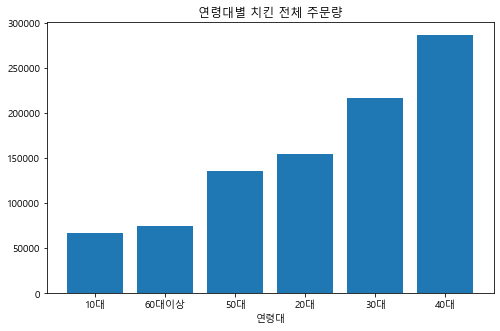

In [38]:
plt.figure(figsize = (8,5))
plt.bar(sorted_sum_of_calls_by_age.index, sorted_sum_of_calls_by_age)
plt.xlabel('연령대') #x축 제목
plt.title('연령대별 치킨 전체 주문량')
plt.show()

In [44]:
groupdata = chicken_data.groupby('시군구')
call_data = groupdata['통화건수']
sum_of_calls_by_city = call_data.sum()
sorted_sum_of_calls_by_city = sum_of_calls_by_city.sort_values(ascending = False) #내림차순
sorted_sum_of_calls_by_city

시군구
강서구     87521
강남구     71456
관악구     63593
서초구     58178
노원구     56383
송파구     54510
성동구     49662
구로구     49635
서대문구    47464
영등포구    45061
강북구     44965
중구      42424
강동구     38339
은평구     34849
마포구     28250
성북구     27926
용산구     24060
중랑구     23381
동대문구    22485
종로구     16360
금천구     16096
양천구     13034
동작구      9621
광진구      7211
도봉구      4879
Name: 통화건수, dtype: int64

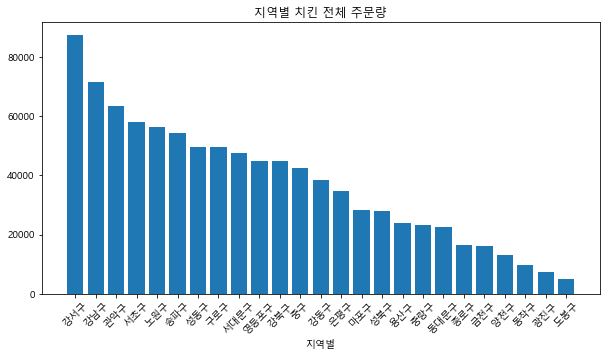

In [50]:
plt.figure(figsize = (10,5))
plt.bar(sorted_sum_of_calls_by_city.index, sorted_sum_of_calls_by_city)
plt.xlabel('지역별')
plt.xticks(rotation = 45) #x축 45도 기울기
plt.title('지역별 치킨 전체 주문량')
plt.show()